#### Looking for **cytokines** and **chemokines**...

In [1]:
# Import necessary libraries
import os
import sys
import re
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import plotly.express as px
import plotly.graph_objects as go
from upsetplot import from_indicators, UpSet
from Bio import SeqIO

# Opcional / útil para estilos de plot
sns.set(style="whitegrid", context="notebook")

# Para mostrar los plots dentro del notebook
%matplotlib inline

In [21]:
# Ensure alldark_df is defined
alldark_path = "/Users/ingridmipe/Documents/UM/Browne_Lab/data/PhagocyteGenes/Phagocyte_Gene_Candidates_IMP/all_marker_dark_genes.csv"
alldark_df = pd.read_csv(alldark_path)

alldark_df

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,X.1,gene_v3,X,...,seed_ortholog,COG_category,Description,Preferred_name,GOs,KEGG_ko,KEGG_Pathway,PFAMs,gene.y,gene_match
0,g-1472,4.840000e-168,4.434267,1.000,0.277,9.680000e-165,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,g-14706,3.770000e-233,9.701888,0.997,0.108,7.540000e-230,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,g-13262,5.040000e-169,7.303671,0.996,0.209,1.010000e-165,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,g-13972,4.290000e-172,13.558506,0.996,0.186,8.570000e-169,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,g-3516,1.100000e-172,12.220518,0.996,0.290,2.200000e-169,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,g-5850,7.590000e-10,1.694591,0.097,0.348,1.520000e-06,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,g-8715,4.770000e-47,1.625087,0.072,0.267,9.540000e-44,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,g-14031,7.080000e-65,3.204459,0.036,0.324,1.420000e-61,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,g-11210,5.880000e-82,4.459029,0.031,0.262,1.180000e-78,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Define paths and read input files
proteome_info_path = '/Users/ingridmipe/Documents/UM/Browne_Lab/data/Gen-Proteomes/Mle_2023_one_seq_proteome.csv'
proteome_fasta_path = '/Users/ingridmipe/Documents/UM/Browne_Lab/data/Gen-Proteomes/Mle_2023_one_seq_proteome.fasta'

proteome_info = pd.read_csv(proteome_info_path)
proteome_sequences = list(SeqIO.parse(proteome_fasta_path, "fasta"))

proteome_info

,Gene_ID,Num_Transcripts,Transcripts_IDs,Transcript_Lengths,Difference_Length,Longest_Transcript,Length
0,g_16414,1,['anno2.3794_t'],[169],0,anno2.3794_t,169
1,g_666,1,['anno1.g689.t1'],[208],0,anno1.g689.t1,208
2,g_667,1,['anno1.g690.t1'],[255],0,anno1.g690.t1,255
3,g_16419,1,['anno2.3801_t'],[193],0,anno2.3801_t,193
4,g_668,2,"['anno1.g691.t1', 'anno2.MSTRG.14.2']","[715, 654]",61,anno1.g691.t1,715
...,...,...,...,...,...,...,...
15540,g_11239,2,"['anno1.g11650.t1', 'anno1.g11650.t2']","[149, 134]",15,anno1.g11650.t1,149
15541,g_11240,3,"['anno1.g11651.t1', 'anno1.g11651.t2', 'anno2....","[2514, 2516, 2556]",42,anno2.MSTRG.20491.3,2556
15542,g_11241,1,['anno1.g11652.t1'],[402],0,anno1.g11652.t1,402
15543,g_16809,1,['anno2.6432_t'],[144],0,anno2.6432_t,144


In [24]:
# Haz un nuevo dataframe con los valores únicos de la columna 'gene'. Luego, crea otra columna 'Ocurrencias' que cuente cuántas veces aparece cada gen en la columna 'gene' del dataframe original alldark_df.
unique_alldark_df = alldark_df[['gene']].drop_duplicates().reset_index(drop=True)
unique_alldark_df['Ocurrences'] = unique_alldark_df['gene'].apply(lambda x: alldark_df[alldark_df['gene'] == x]['gene'].count())
unique_alldark_df

# Crea una nueva columna 'Cluster' en donde aparezca en que cluster o clusteres está cada gen, según la información del dataframe original alldark_df.
def get_clusters(gene):
    clusters = alldark_df[alldark_df['gene'] == gene]['cluster'].unique()
    return ', '.join(map(str, clusters))
unique_alldark_df['cluster'] = unique_alldark_df['gene'].apply(get_clusters)
unique_alldark_df

# Change '-' to '_' in the 'gene' column of the unique_alldark_df dataframe.
unique_alldark_df['gene'] = unique_alldark_df['gene'].str.replace('-', '_')
unique_alldark_df

# Add a column called 'length' to unique_alldark_df with the length of each gene sequence from proteome_info. Match by 'gene' and 'Gene_ID' columns.
def get_gene_length(gene):
    length = proteome_info[proteome_info['Gene_ID'] == gene]['Length']
    if not length.empty:
        return length.values[0]
    return np.nan
unique_alldark_df['Length'] = unique_alldark_df['gene'].apply(get_gene_length)
unique_alldark_df

# Add a column named 'Transcript_ID' to unique_alldark_df with the corresponding Longest_Transcript from proteome_info. Match by 'gene' and 'Gene_ID' columns.
def get_transcript_id(gene):
    transcript_id = proteome_info[proteome_info['Gene_ID'] == gene]['Longest_Transcript']
    if not transcript_id.empty:
        return transcript_id.values[0]
    return np.nan

unique_alldark_df['Transcript_ID'] = unique_alldark_df['gene'].apply(get_transcript_id)
unique_alldark_df

# Make a subset of unique_alldark_df with genes that have Length more than 500
#long_genes_df = unique_alldark_df[unique_alldark_df['Length'] > 500].reset_index(drop=True)
#long_genes_df

,gene,Ocurrences,cluster,Length,Transcript_ID
0,g_1472,3,"13, 20, 15",187,anno1.g1528.t1
1,g_14706,1,8,173,anno1.g15224.t1
2,g_13262,1,13,195,anno2.MSTRG.14836.2
3,g_13972,1,13,152,anno1.g14463.t1
4,g_3516,1,13,207,anno1.g3645.t1
...,...,...,...,...,...
329,g_1200,2,"5, 18",101,anno1.g1244.t1
330,g_5437,2,"5, 15",342,anno1.g5638.t1
331,g_8419,3,"16, 9, 5",173,anno1.g8743.t1
332,g_8715,2,"7, 11",200,anno2.MSTRG.18825.1


In [6]:
# Make a fasta file with the sequences of long_genes_df. Use the Transcript_ID column to match the sequences.
#long_genes_transcript_ids = set(long_genes_df['Transcript_ID'])
#long_genes_transcript_sequences = [record for record in proteome_sequences if record.id in long_genes_transcript_ids]

# Save the transcript sequences to a new fasta file
#long_genes_transcripts_fasta_path = '/Users/ingridmipe/Documents/UM/Browne_Lab/data/PhagocyteGenes/Phagocyte_Long_Genes/long_genes_phagocyte.fasta'
#SeqIO.write(long_genes_transcript_sequences, long_genes_transcripts_fasta_path, "fasta")

In [14]:
# Read FANTASIA results' csv file
fantasia_results = pd.read_csv('/Users/ingridmipe/Documents/UM/Browne_Lab/results/fantasia/experiments/phagocyte_20251030155644_longseqs/results.csv')
#fantasia_results = pd.read_csv('results/fantasia/experiments/sample_20251003105412/results.csv') 
fantasia_results

,accession,go_id,category,evidence_code,go_description,distance,model_name,protein_id,organism,gene_name,...,collapsed_support,n_collapsed_terms,collapsed_terms,identity,similarity,alignment_score,gaps_percentage,alignment_length,length_query,length_reference
0,anno1.g10045.t1,GO:0000082,P,IMP,G1/S transition of mitotic cell cycle,0.0633,Prost-T5,A0A1D8PED2_CANAL,Candida albicans (strain SC5314 / ATCC MYA-287...,"SWI6 {ECO:0000313|CGD:CAL0000183437, ECO:00003...",...,0,0,NaN,16.5161,32.5161,-101,26.7097,775,614,729
1,anno1.g10045.t1,GO:0000138,C,IDA,Golgi trans cisterna,0.0606,Prost-T5,TBC8_CAEEL,Caenorhabditis elegans.,tbc-8 {ECO:0000312|WormBase:C38H2.1a},...,0,0,NaN,17.6279,28.6181,-203,33.8411,919,614,913
2,anno1.g10045.t1,GO:0000212,P,IMP,meiotic spindle organization,0.2437,Prot-T5,O17666_CAEEL,Caenorhabditis elegans.,"aspm-1 {ECO:0000313|EMBL:CAB07174.1, ECO:00003...",...,0,0,NaN,13.5565,25.1046,-364,49.3724,1195,614,1186
3,anno1.g10045.t1,GO:0000278,P,IDA,mitotic cell cycle,0.0194,ESM3c,GCP2_GIAIC,Giardia intestinalis (strain ATCC 50803 / WB c...,NaN,...,0,0,NaN,16.9043,30.9572,-176,39.6130,982,614,961
4,anno1.g10045.t1,GO:0000785,C,IDA,chromatin,0.0122,ESM,CDC10_SCHPO,Schizosaccharomyces pombe (strain 972 / ATCC 2...,cdc10,...,0,0,NaN,14.9746,30.2030,-105,24.7462,788,614,767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6617,anno2.MSTRG.9535.2,GO:0060026,P,IMP,convergent extension,0.0182,Prost-T5,AML2A_DANRE,Danio rerio (Zebrafish) (Brachydanio rerio).,amotl2a,...,0,0,NaN,18.8131,32.8283,-45,19.5707,792,708,721
6618,anno2.MSTRG.9535.2,GO:0090435,P,IMP,protein localization to nuclear envelope,0.0080,ESM,UNC83_CAEEL,Caenorhabditis elegans.,"unc-83 {ECO:0000303|PubMed:11748140, ECO:00003...",...,0,0,NaN,15.7209,28.8372,-150,37.3023,1075,708,1041
6619,anno2.MSTRG.9535.2,GO:0090435,P,IMP,protein localization to nuclear envelope,0.0191,ESM3c,UNC83_CAEEL,Caenorhabditis elegans.,"unc-83 {ECO:0000303|PubMed:11748140, ECO:00003...",...,0,0,NaN,15.7209,28.8372,-150,37.3023,1075,708,1041
6620,anno2.MSTRG.9535.2,GO:0099513,C,IDA,polymeric cytoskeletal fiber,0.0182,Prost-T5,AML2A_DANRE,Danio rerio (Zebrafish) (Brachydanio rerio).,amotl2a,...,0,0,NaN,18.8131,32.8283,-45,19.5707,792,708,721


In [15]:
# Defining interesting GO terms related to cytokine and chemokine activities.
cytokine_go_terms = [
    'GO:0005125', 'GO:0060300', 'GO:0060302'
]
chemokine_go_terms = [
    'GO:0008009', 'GO:1900136', 'GO:1900137'
]
# Combining cytokine and chemokine GO terms into a single list.
cytokine_chemokine_go_terms = cytokine_go_terms + chemokine_go_terms


## Cytokines GO terms
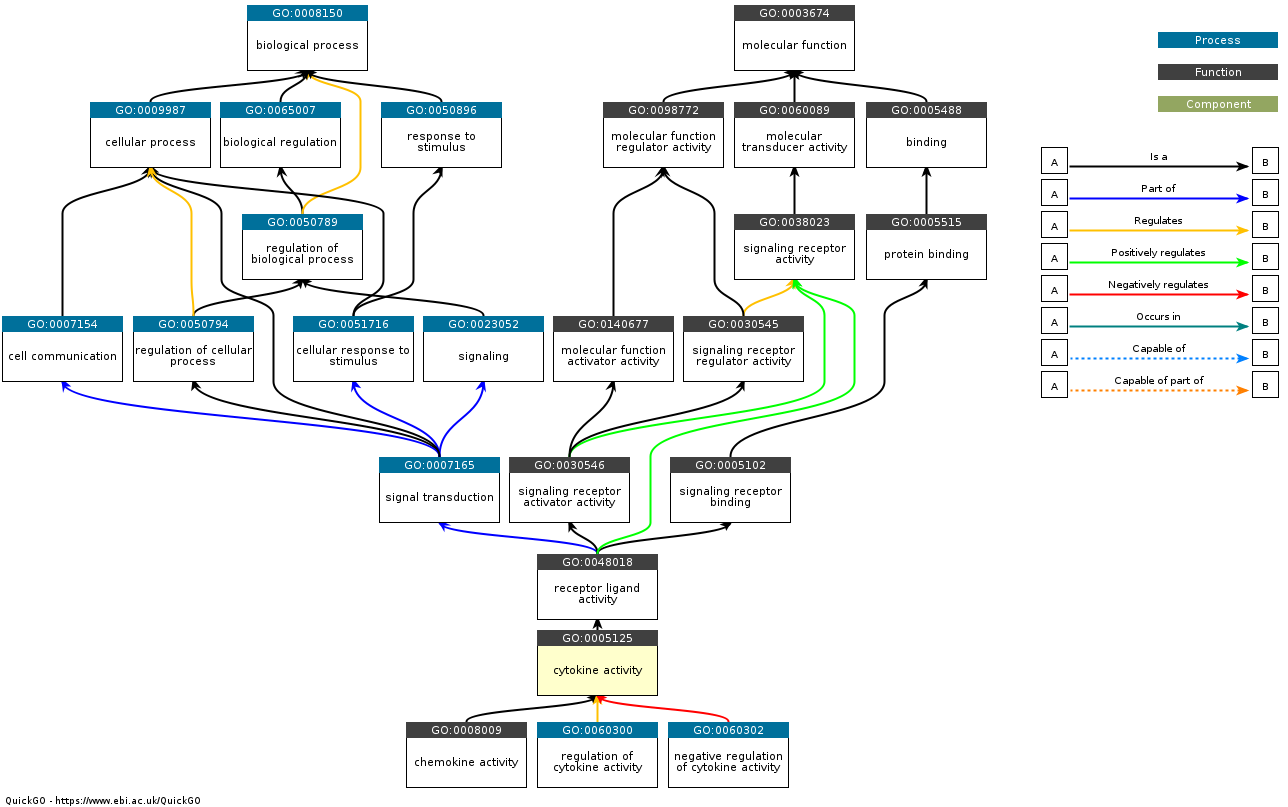

## Chemokines GO terms
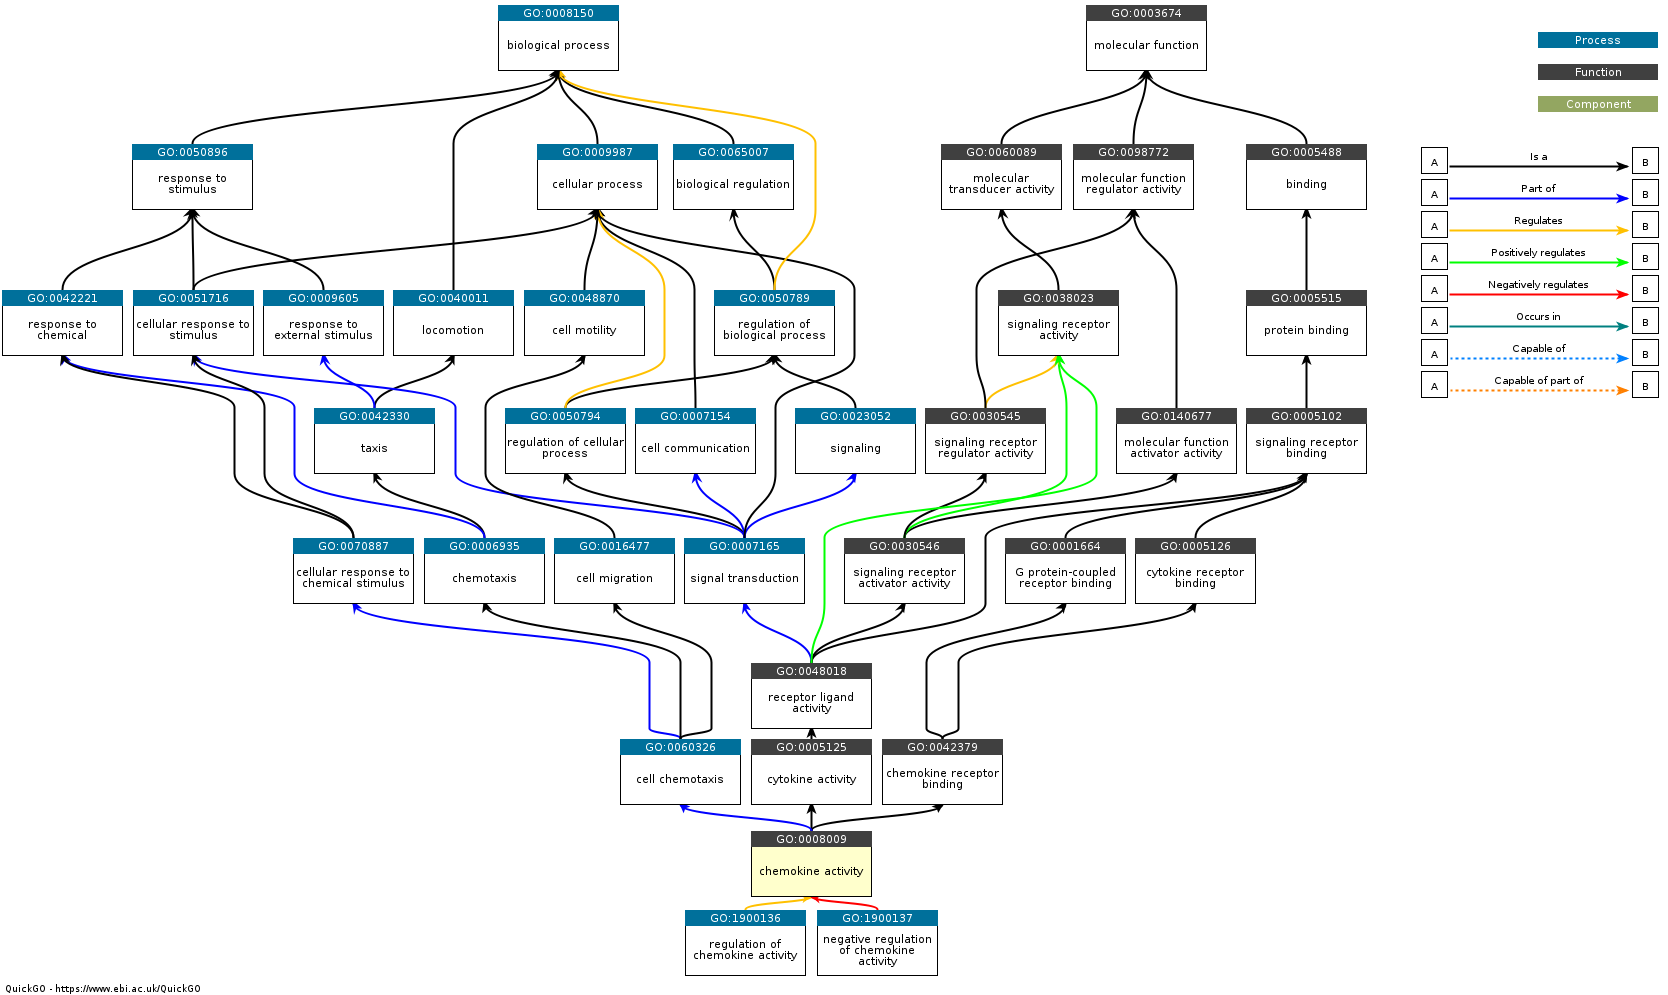

In [16]:
# Filter the dataframe based on the presence of GO terms in the 'go_id' column
filtered_df = fantasia_results[fantasia_results['go_id'].isin(cytokine_chemokine_go_terms)]
filtered_df

,accession,go_id,category,evidence_code,go_description,distance,model_name,protein_id,organism,gene_name,...,collapsed_support,n_collapsed_terms,collapsed_terms,identity,similarity,alignment_score,gaps_percentage,alignment_length,length_query,length_reference


In [17]:
# Find anything with the word "cytokine" or "chemokine" in the 'go_description' column
cytokine_chemokine_desc_df = fantasia_results[fantasia_results['go_description'].str.contains('cytokine|chemokine', case=False, na=False)]
cytokine_chemokine_desc_df

,accession,go_id,category,evidence_code,go_description,distance,model_name,protein_id,organism,gene_name,...,collapsed_support,n_collapsed_terms,collapsed_terms,identity,similarity,alignment_score,gaps_percentage,alignment_length,length_query,length_reference
5,anno1.g10045.t1,GO:0000911,P,IMP,cytokinesis by cell plate formation,0.0200,ESM3c,TPLAT_ARATH,Arabidopsis thaliana (Mouse-ear cress).,TPLATE,...,0,0,NaN,14.3453,24.1034,-346,50.7089,1199,614,1176
274,anno1.g10225.t1,GO:0000281,P,IMP,mitotic cytokinesis,0.0526,Prost-T5,DWWA_DICDI,Dictyostelium discoideum (Social amoeba).,dwwA {ECO:0000312|EMBL:EAL66473.1},...,0,0,NaN,17.0915,34.6327,-23,24.2879,667,604,568
378,anno1.g10225.t1,GO:1902408,P,IMP,"mitotic cytokinesis, division site positioning",0.2293,Prot-T5,YDEA_SCHPO,Schizosaccharomyces pombe (strain 972 / ATCC 2...,NaN,...,0,0,NaN,16.1342,29.7125,-101,36.5815,626,604,419
407,anno1.g10226.t1,GO:0005126,F,IPI,cytokine receptor binding,0.2134,Prot-T5,STAT_DROME,Drosophila melanogaster (Fruit fly).,Stat92E,...,0,0,NaN,16.3848,32.3467,-28,28.3298,946,863,761
1028,anno1.g12614.t1,GO:0000281,P,IMP,mitotic cytokinesis,0.0259,Prost-T5,Q7KTL5_DROME,Drosophila melanogaster (Fruit fly).,"sip2 {ECO:0000313|EMBL:AAN10606.2, ECO:0000313...",...,0,0,NaN,19.1350,31.0616,-82,28.1782,763,654,657
1166,anno1.g12614.t1,GO:1902413,P,IMP,negative regulation of mitotic cytokinesis,0.0265,Prost-T5,TOS2_YEAST,Saccharomyces cerevisiae (strain ATCC 204508 /...,TOS2,...,0,0,NaN,17.0270,28.3784,-61,27.5676,740,654,622
1613,anno1.g1393.t1,GO:1902412,P,IMP,regulation of mitotic cytokinesis,0.0196,Ankh3-Large,INCE_SCHPO,Schizosaccharomyces pombe (strain 972 / ATCC 2...,pic1,...,0,0,NaN,16.3134,28.9017,-145,36.4804,1557,1528,1018
2020,anno1.g15335.t2,GO:0000281,P,IMP,mitotic cytokinesis,0.0135,Prost-T5,YKQ7_SCHPO,Schizosaccharomyces pombe (strain 972 / ATCC 2...,NaN,...,0,0,NaN,16.4740,29.3353,-120,29.6243,1384,1320,1038
2061,anno1.g15335.t2,GO:0032465,P,IMP,regulation of cytokinesis,0.0184,Ankh3-Large,FIR1_YEAST,Saccharomyces cerevisiae (strain ATCC 204508 /...,FIR1,...,0,0,NaN,16.9118,29.0441,-149,38.5294,1360,1320,876
2086,anno1.g15687.t1,GO:0000281,P,IMP,mitotic cytokinesis,0.3082,Prot-T5,SADA_DICDI,Dictyostelium discoideum (Social amoeba).,sadA,...,0,0,NaN,14.0062,25.3347,-258,42.5335,971,577,952


In [18]:
# Creat a new dataframe with the unique values from the column 'accession' in filtered_df. But just the values, no all the other columns.
unique_accessions = filtered_df['accession'].unique()
unique_accessions_df = pd.DataFrame(unique_accessions, columns=['accession'])


# Add a new column called 'cytokine_chemokine_go_id' where you add all the values sepparated by commas appearing in 'go_id' from filtered_df.
go_id_aggregated = filtered_df.groupby('accession')['go_id'].apply(lambda x: ','.join(x.unique())).reset_index()
go_id_aggregated.rename(columns={'go_id': 'cytokine_chemokine_go_id'}, inplace=True)
unique_accessions_df = unique_accessions_df.merge(go_id_aggregated, on='accession', how='left')


# Add a new column where you indicate what models predicted go_id for each accession. The models are in the column 'model_name' in filtered_df. Sepparate the values by commas.
model_aggregated = filtered_df.groupby('accession')['model_name'].apply(lambda x: ','.join(x.unique())).reset_index()
model_aggregated.rename(columns={'model_name': 'predicting_models'}, inplace=True)
unique_accessions_df = unique_accessions_df.merge(model_aggregated, on='accession', how='left')


# Add a new column called 'reliability_index' where you indicate the value from the column 'reliability_index' in filtered_df for each accession according to the model_name order.
reliability_index_aggregated = filtered_df.groupby('accession')['reliability_index'].apply(lambda x: ','.join(x.astype(str).unique())).reset_index()
unique_accessions_df = unique_accessions_df.merge(reliability_index_aggregated, on='accession', how='left')


# Add a new column called 'go_description' where you indicate the value from the column 'go_description' in filtered_df for each accession according to the go_id order.
go_description_aggregated = filtered_df.groupby('accession')['go_description'].apply(lambda x: ','.join(x.unique())).reset_index()
go_description_aggregated.rename(columns={'go_description': 'go_description'}, inplace=True)
unique_accessions_df = unique_accessions_df.merge(go_description_aggregated, on='accession', how='left')

# Make a merge with short_genes_df by the column 'accession' in unique_accessions_df and 'Transcript_ID' in short_genes_df to add all the columns from short_genes_df to unique_accessions_df.
unique_accessions_df = unique_accessions_df.merge(short_genes_df, left_on='accession', right_on='Transcript_ID', how='left')
unique_accessions_df

NameError: name 'short_genes_df' is not defined